In [ ]:
# importing necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# calculating break-even point
def calculate_break_even(K, P, option):
    if(option == 'C'):
        breakeven = K+P
    elif(option == 'P'):
        breakeven = K-P
    return breakeven

In [44]:
# Taking Inputs
K = int(input("Enter Strike Price: "))
P = int(input("Enter Premium: "))
print('Enter the range of Spot Price in the format: [K-R1, K+R2]')
R1 = int(input("Enter the value of R1: "))
R2 = int(input("Enter the value of R2: "))
option = input("Enter C for Call Option or P for Put Option: ")
breakeven = calculate_break_even(K, P, option)
S1 = list(range(K-R1, K))
S2 = list(range(K, K+R2))
S = S1 + S2
exercise_point = S.index(K)

Enter the range of Spot Price in the format: [K-R1, K+R2]


In [47]:
# Calculating Payoffs
payoff = []
if option == 'C':        ## Call Option
    
    if P > 0:            ## Buy
        for i in range(len(S)):
            payoff.append(max(0, S[i]-K) - P)
    elif P < 0:          ## Sell
        for i in range(len(S)):
            payoff.append(-1*P - max(0, S[i]-K))
            
elif option == 'P':        ## Put Option
    
    if P > 0:            ## Buy
        for i in range(len(S)):
            payoff.append(max(0, K-S[i]) - P)
    elif P < 0:          ## Sell
        for i in range(len(S)):
            payoff.append(-1*P - max(0, K-S[i]))

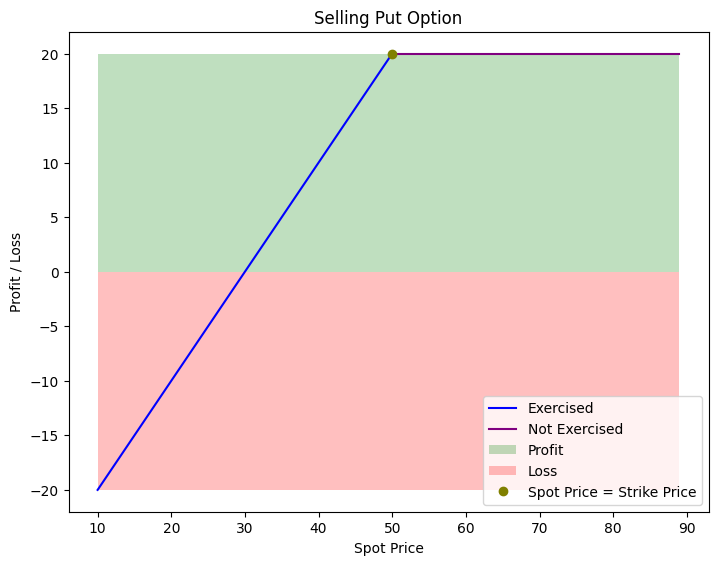

In [48]:
# Plotting Graphs
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
if option=='C': 
    ax.plot(S[:exercise_point+1], payoff[:exercise_point+1], c='purple', label='Not Exercised')
    ax.plot(S[exercise_point:], payoff[exercise_point:], c='blue', label='Exercised')
    if P>0: plot_title = 'Buying Call Option'
    elif P<0: plot_title = 'Selling Call Option'
elif option=='P':
    ax.plot(S[:exercise_point+1], payoff[:exercise_point+1], c='blue', label='Exercised')
    ax.plot(S[exercise_point:], payoff[exercise_point:], c='purple', label='Not Exercised')
    if P>0: plot_title = 'Buying Put Option'
    elif P<0: plot_title = 'Selling Put Option'
    
ax.fill_between(S, max(payoff), 0, facecolor='green', alpha=0.25, interpolate=True, label='Profit')
ax.fill_between(S, 0, min(payoff), facecolor='red', alpha=0.25, interpolate=True, label='Loss')
ax.set_xlabel('Spot Price')
ax.set_ylabel('Profit / Loss')
if P>0: ax.plot(breakeven, 0, 'o', c='black', label=f'Breakeven-Point: {breakeven}')
ax.plot(S[exercise_point], payoff[exercise_point], 'o', c='olive', label = 'Spot Price = Strike Price')
ax.set_title(plot_title)

ax.legend()

In [49]:
"""
Explanation of the Four Methods:-
    1. Buying a Call Option:  This is done when we expect the market to be bullish i.e., the stock price to rise
                              Exercised when Strike Price < Spot Price
                              Profit earned when Strike Price + Premium < Spot Price
                              Max Profit = Unlimited
                              Max Loss = Premium
    2. Buying a Put Option :  This is done when we expect the market to be bearish i.e., the stock price to drop
                              Exercised when Strike Price > Spot Price
                              Profit earned when Strike Price - Premium > Spot Price
                              Max Profit = Strike Price - Premium
                              Max Loss = Premium
    3. Selling a Call Option: This is done when we expect the market to remain neutral or be slighly bearish
                              Exercised when Strike Price < Spot Price by the buyer
                              Profit earned when Strike Price + Premium > Spot Price
                              Max Profit = Premium
                              Max Loss = Unlimited
    1. Buying a Call Option:  This is done when we expect the market to remain neutral or be slighly bullish
                              Exercised when Strike Price > Spot Price by the buyer
                              Profit earned when Strike Price - Premium < Spot Price
                              Max Profit = Premium
                              Max Loss = Strike Price - Premium
"""

'\nExplanation of the Four Methods:-\n    1. Buying a Call Option:  This is done when we expect the market to be bullish i.e., the stock price to rise\n                              Exercised when Strike Price < Spot Price\n                              Profit earned when Strike Price + Premium < Spot Price\n                              Max Profit = Unlimited\n                              Max Loss = Premium\n    2. Buying a Put Option :  This is done when we expect the market to be bearish i.e., the stock price to drop\n                              Exercised when Strike Price > Spot Price\n                              Profit earned when Strike Price - Premium > Spot Price\n                              Max Profit = Strike Price - Premium\n                              Max Loss = Premium\n    3. Selling a Call Option: This is done when we expect the market to remain neutral or be slighly bearish\n                              Exercised when Strike Price < Spot Price by the buyer\n  

In [ ]:
"""
Explanation for the Greeks:-
    1. Delta: It is the amount by which option price changes with 1 dollar increase in stock price
              Its value represents whether the option is ITM, ATM or OTM
              For Call Options- it lies between 0 (OTM) and 1 (ITM)
              For Put Options- it lies between -1 (ITM) and 0 (OTM)
    2. Gamma: It is the rate of change of delta with stock price
              Its value represents delta stability- delta is most unstable at ATM which is the point of maximum uncertainty 
              For Call Options- it is positive with max at ATM and approaching 0 at both ITM and OTM
              For Put Options- it is negative with min at ATN and approaching 0 at both ITM and OTM
    3. Theta: It is the rate of change of delta with passage of time
              It represents the effect of decreasing time value on option price
              For Call and Put Options- it is negative and accelerates as expiry date comes closer
    4. Vega:  It is the change in option price when implied volatility increases by 1%
              It represents the effect of market fluctuation on option price, it is the maximum at ATM bcuz again the uncertainty is maximum
              For both Call and Put Options- it is positive with max at ATM and approaching 0 at both ITM and OTM
    5. Rho:   It is the change in option price when risk-free interest rate increase by 1%
              Basically, higher interest rates > money is more valuable
              For Call Options- it is positive because call options postpone payment
              For Put Options- it is negative because put options prepose payment
    *All the values of Greeks mentioned above are for Buying Options (Long Options),
    for Selling Options (Short Options), position value reverses and hence all the greeks will have opposite sign for both the options
"""